## Problem Statement

In [170]:
#To predict sales price of items by using Supervised Machine Learning algorithm

## Importing Libraries

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.figure_factory as ff
from sklearn.preprocessing import OrdinalEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import skew,zscore

from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pickle
import json

## Importing Data 

In [172]:
df = pd.read_csv(r"D:\shraddha\Python_Working\ML_Velocity\Sales\Project_app\CSV\Sales_data.csv")

In [173]:
print("Items Outlet Sales -  rows:",df.shape[0],"columns:",df.shape[1])

Items Outlet Sales -  rows: 8523 columns: 12


In [174]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Glimpse the data

In [175]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## checking for statistical summary

In [176]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


## checking for Dataset summary

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Checking for Null values in dataset

In [178]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# Checking for outliers in Data

Item_Weight                     AxesSubplot(0.125,0.11;0.133621x0.77)
Item_Visibility              AxesSubplot(0.285345,0.11;0.133621x0.77)
Item_MRP                      AxesSubplot(0.44569,0.11;0.133621x0.77)
Outlet_Establishment_Year    AxesSubplot(0.606034,0.11;0.133621x0.77)
Item_Outlet_Sales            AxesSubplot(0.766379,0.11;0.133621x0.77)
dtype: object

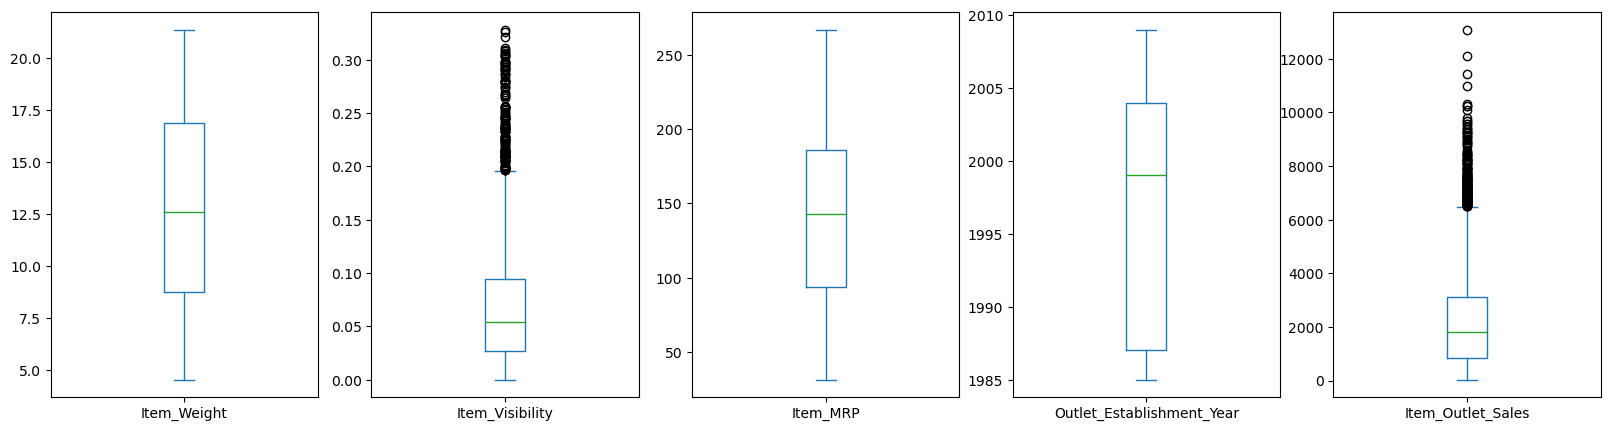

In [179]:
df.plot(kind='box', subplots=True, figsize=(20,5))

# Assumption

## Linearity

<AxesSubplot:>

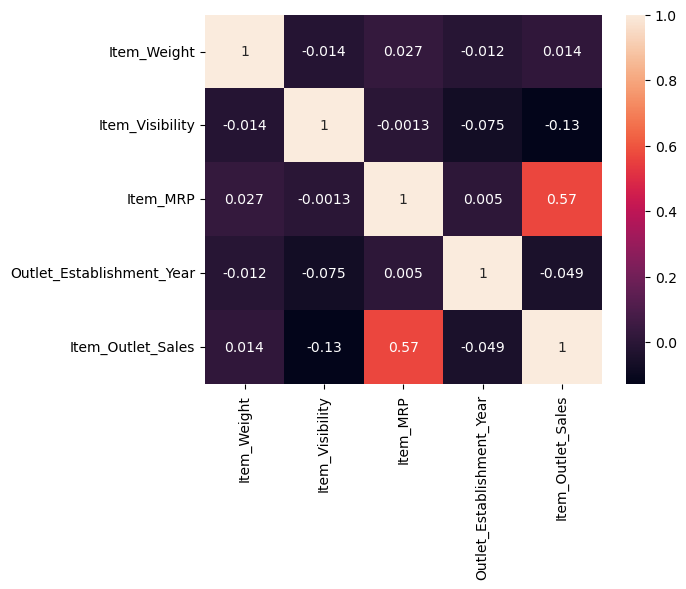

In [180]:
sns.heatmap(df.corr(),annot=True)

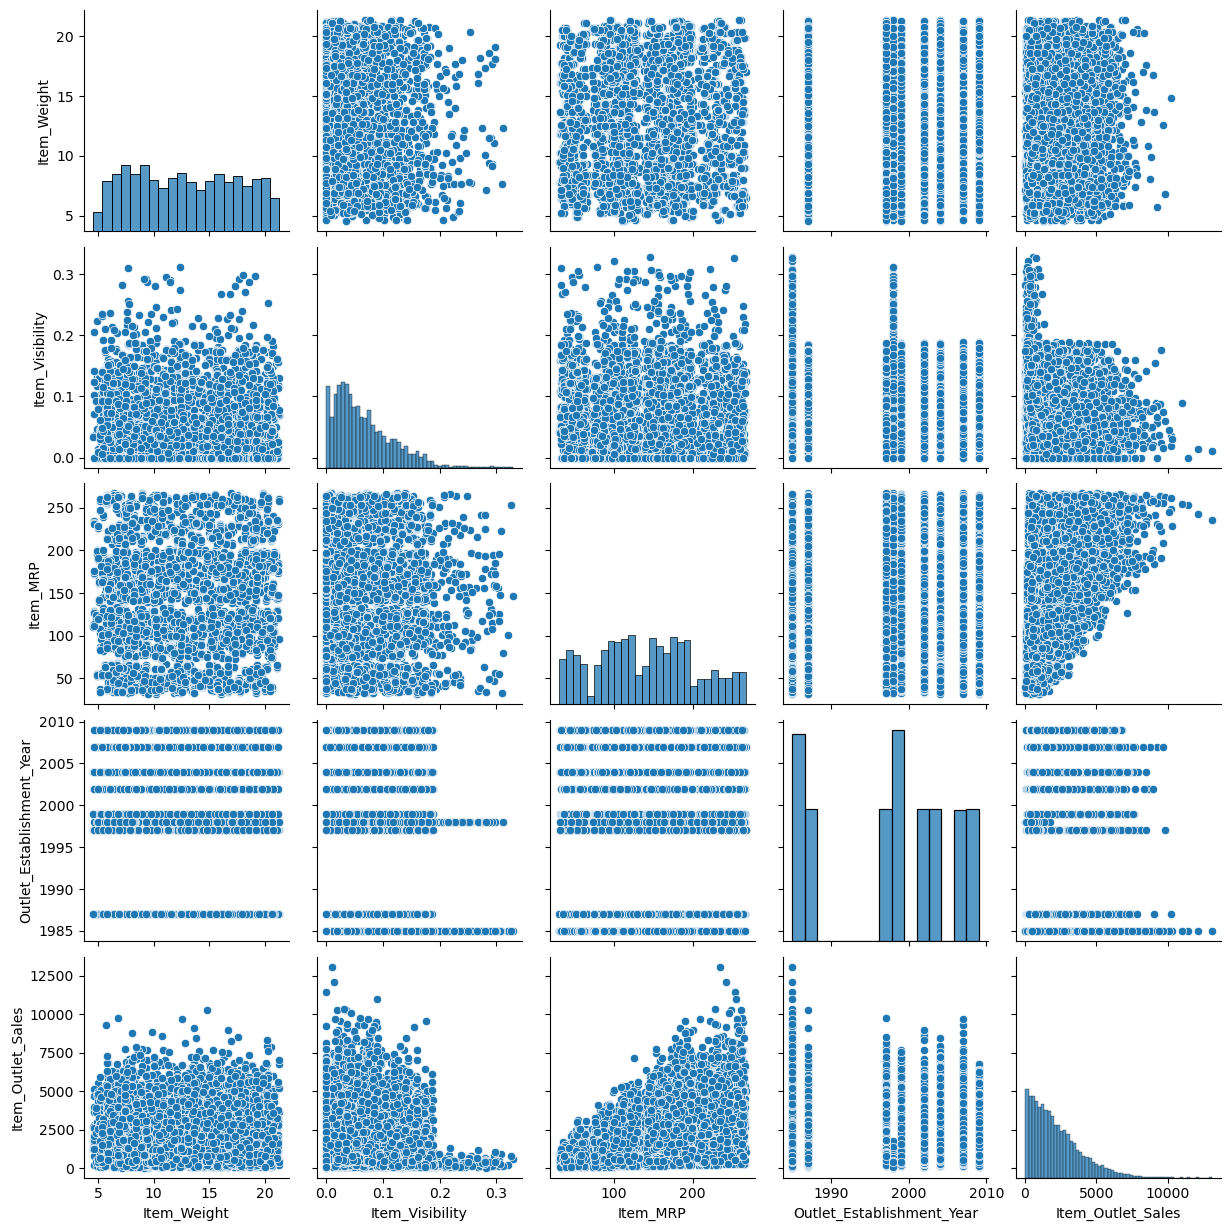

In [181]:
sns.pairplot(df)

### 1.Item_Identifier

##### Dropping this column as no use

In [182]:
df1 = df.drop('Item_Identifier',axis=1)
df1.head() 

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### 2. Item_Weight

In [183]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [184]:
df1["Item_Weight"].isna().sum()

1463

In [185]:
df1["Item_Weight"].value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64

<AxesSubplot:xlabel='Item_Weight'>

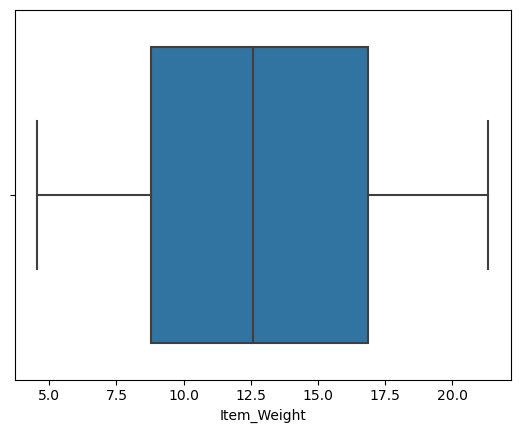

In [186]:
# checking for outliers
sns.boxplot(df1["Item_Weight"])

In [187]:
df1["Item_Weight"].isna().sum()

1463

In [188]:
# replacing nan value with mean value.
df1["Item_Weight"] = df1["Item_Weight"].fillna(df1["Item_Weight"].mean())

In [189]:
df1["Item_Weight"].isna().sum()

0

<AxesSubplot:xlabel='Item_Weight'>

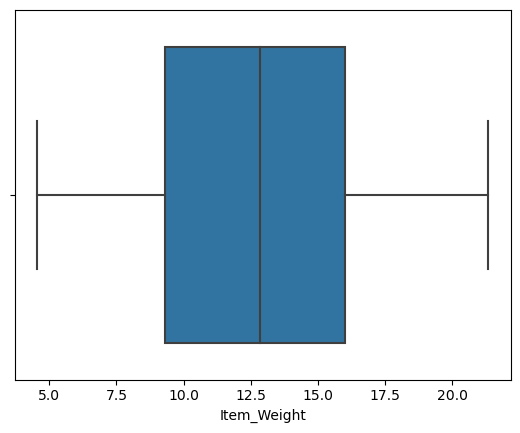

In [190]:
sns.boxplot(df1["Item_Weight"])

In [191]:
df1.head(1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [192]:
# scalling down the values with zscore method
# scaler =  MinMaxScaler()
# normalized_data  = scaler.fit_transform(df1[["Item_Weight"]])
# normalized_data

In [193]:
# normalized_data = pd.DataFrame(normalized_data, columns = ["Item_Weight"])
# normalized_data

In [194]:
# df1 = pd.concat([normalized_data,df1.iloc[:,1:]],axis=1)
# df1.head()

<AxesSubplot:xlabel='Item_Weight'>

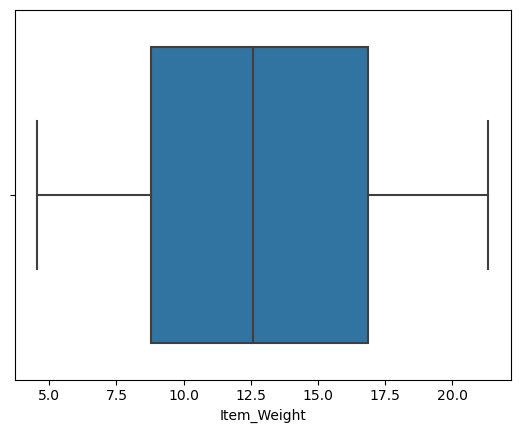

In [195]:
sns.boxplot(df["Item_Weight"])

In [196]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


#### 3. Item_Fat_Content

In [197]:
df1["Item_Fat_Content"].value_counts().to_dict()

{'Low Fat': 5089, 'Regular': 2889, 'LF': 316, 'reg': 117, 'low fat': 112}

In [198]:
# replaced duplicate value with one value
df1["Item_Fat_Content"] = df1["Item_Fat_Content"].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [199]:
df1["Item_Fat_Content"].value_counts().to_dict()

{'Low Fat': 5517, 'Regular': 3006}

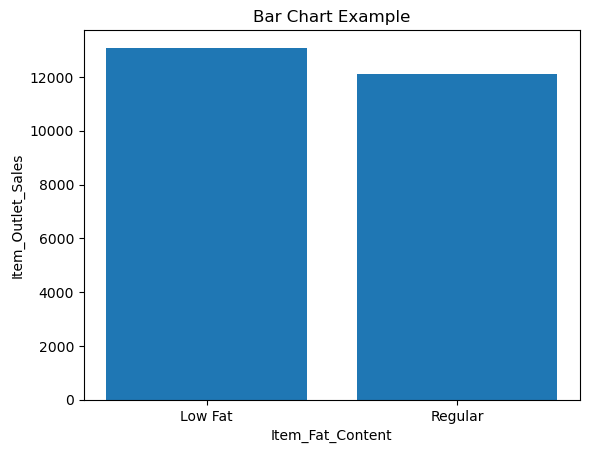

In [200]:
plt.bar(df1["Item_Fat_Content"],df1["Item_Outlet_Sales"])
plt.title("Bar Chart Example")
plt.xlabel("Item_Fat_Content")
plt.ylabel("Item_Outlet_Sales")
plt.show()

In [201]:
# performing ordinal ecoding
ordinal_enc_Item_Fat_Content = OrdinalEncoder(categories = [['Low Fat', 'Regular']])

In [202]:
ordinal_enc_Item_Fat_Content_array = ordinal_enc_Item_Fat_Content.fit_transform(df1[["Item_Fat_Content"]])

In [203]:
Item_Fat_Content_values = df1["Item_Fat_Content"].value_counts().to_dict()


In [204]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [205]:
# converting into dataframe
df_Item_Fat_Content = pd.DataFrame(ordinal_enc_Item_Fat_Content_array, columns = ["Item_Fat_Content"],dtype=int)
df_Item_Fat_Content.head()

,Item_Fat_Content
0,0
1,1
2,0
3,1
4,0


In [206]:
# combining columns and created new dataframe
df1 = pd.concat([df1["Item_Weight"],df_Item_Fat_Content,df1.iloc[:,2:]],axis=1)
df1.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [207]:
Item_Fat_Content_values = {'Low Fat': 0, 'Regular': 1}
Item_Fat_Content_values

{'Low Fat': 0, 'Regular': 1}

#### 4.Item_Visibility

In [208]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 699.3+ KB


In [209]:
# checking for null value, no nan value present howerver some data having Zero as a value.
df1["Item_Visibility"].isna().sum()

0

In [210]:
df1[df1["Item_Visibility"].isna()]

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [211]:
# df1["Item_Visibility"] = np.power(df1["Item_Visibility"],3)

In [212]:
df1["Item_Visibility"] = df1["Item_Visibility"].replace({0.0:df1["Item_Visibility"].mean()})

In [213]:
df1["Item_Visibility"].value_counts()

0.066132    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64

In [214]:
df1["Item_Visibility"].unique()

array([0.0160473 , 0.01927822, 0.01676007, ..., 0.03518627, 0.14522065,
       0.04487828])

<AxesSubplot:xlabel='Item_Visibility'>

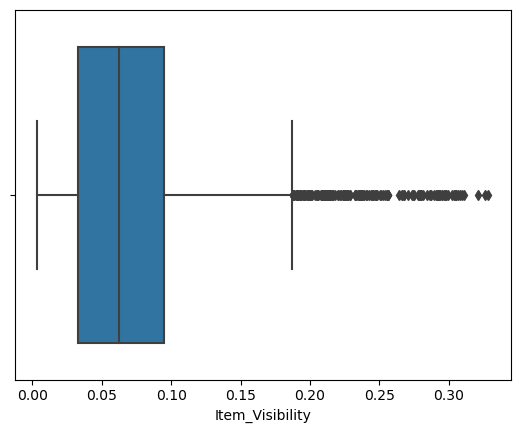

In [215]:
# checking for outliers and outlier present in our data
sns.boxplot(df1["Item_Visibility"])

In [216]:
# removing outliers with IQR method

q1 = df1["Item_Visibility"].quantile(0.25)
q2 = df1["Item_Visibility"].quantile(0.50)
q3 = df1["Item_Visibility"].quantile(0.75)
IQR = q3 - q1
upper_tail_1 = q3 + 1.5*IQR
lower_tail_1 = q1 - 1.5*IQR
print("Q1 :", q1)
print("Q2 :", q2)
print("Q3 :", q3)
print("upper_tail :", upper_tail_1)
print("lower_tail :", lower_tail_1)

Q1 : 0.0330853435
Q2 : 0.062516602
Q3 : 0.0945852925
upper_tail : 0.186835216
lower_tail : -0.059164579999999994


In [217]:
# retriving outliers
df1[["Item_Visibility"]].loc[(df1["Item_Visibility"] > upper_tail_1)]

,Item_Visibility
49,0.255395
65,0.195068
83,0.293418
108,0.278974
174,0.291865
...,...
8292,0.209163
8345,0.266397
8371,0.214125
8432,0.227261


In [218]:
df1[["Item_Visibility"]].loc[(df1["Item_Visibility"] < lower_tail_1)]

,Item_Visibility


In [219]:
# item_Visibility_No_outlier_median_1 = df1["Item_Visibility"][(df1["Item_Visibility"] <= upper_tail_1)].median()
# item_Visibility_No_outlier_median_1

In [220]:
df1.loc[(df1["Item_Visibility"] > upper_tail_1),"Item_Visibility"] = upper_tail_1

In [221]:
df1["Item_Visibility"].isna().sum()

0

<AxesSubplot:xlabel='Item_Visibility'>

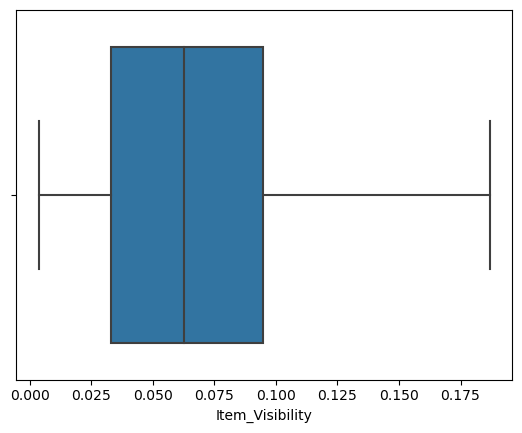

In [222]:
# still outlier present in column
sns.boxplot(df1["Item_Visibility"])

In [223]:
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,0,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,1,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,0,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#### 5. Item_Type


In [224]:
df1["Item_Type"].isna().sum()

0

In [225]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(5)
memory usage: 699.3+ KB


In [226]:
value_count = df1["Item_Type"].value_counts()
value_count

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

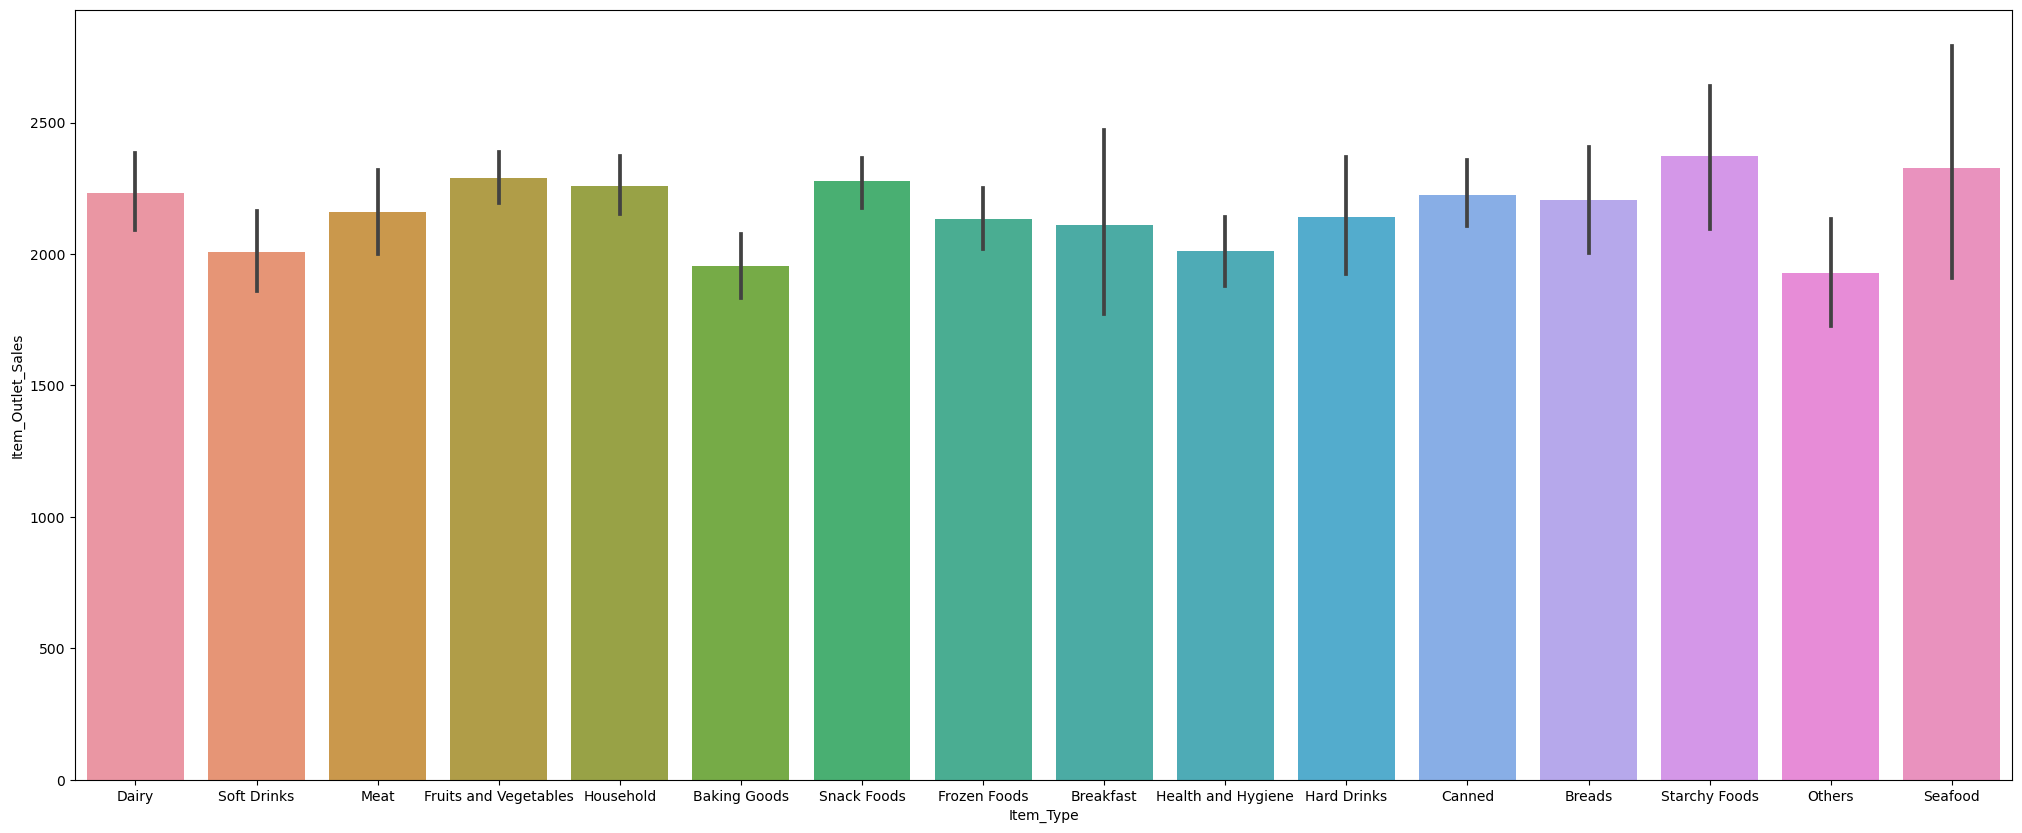

In [227]:
plt.figure(figsize=(25,10))
sns.barplot(df['Item_Type'], df['Item_Outlet_Sales'])

In [228]:
threshold = 150

In [229]:
# finding categories which is greter than 500
replace = value_count[value_count <= 150].index

In [230]:
# finding categories which is less than 500 and keeping all those in uncommon column
df1 = pd.get_dummies(df1.replace(replace,"Others"),columns=["Item_Type"],prefix = "IT",drop_first=True)
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,...,IT_Dairy,IT_Frozen Foods,IT_Fruits and Vegetables,IT_Hard Drinks,IT_Health and Hygiene,IT_Household,IT_Meat,IT_Others,IT_Snack Foods,IT_Soft Drinks
0,9.30,0,0.016047,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,...,1,0,0,0,0,0,0,0,0,0
1,5.92,1,0.019278,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,...,0,0,0,0,0,0,0,0,0,1
2,17.50,0,0.016760,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,...,0,0,0,0,0,0,1,0,0,0
3,19.20,1,0.066132,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,...,0,0,1,0,0,0,0,0,0,0
4,8.93,0,0.066132,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,...,0,0,0,0,0,1,0,0,0,0


### 6. Item_MRP

In [231]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Identifier          8523 non-null   object 
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                6113 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
 10  IT_Breads                  8523 non-null   uint8  
 11  IT_Canned                  8523 non-null   uint8  
 12  IT_Dairy                   8523 non-null   uint8  
 13  IT_Frozen Foods            8523 non-null   uint8

In [232]:
df1["Item_MRP"].isna().sum()

0

In [233]:
# Transformation of this column
df1["Item_MRP"] = np.cbrt(df1["Item_MRP"])

<AxesSubplot:xlabel='Item_MRP'>

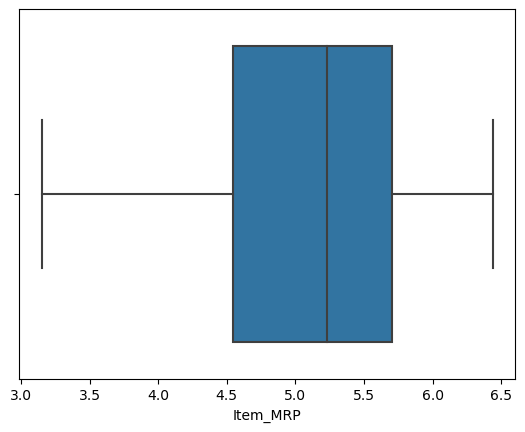

In [234]:
# no outliers present
sns.boxplot(df1["Item_MRP"])

#### 7. Outlet_Identifier

In [235]:
df1["Outlet_Identifier"].value_counts().sort_values(ascending = True)

OUT019    528
OUT010    555
OUT017    926
OUT018    928
OUT045    929
OUT049    930
OUT046    930
OUT035    930
OUT013    932
OUT027    935
Name: Outlet_Identifier, dtype: int64

In [236]:
df1["Outlet_Identifier"].isna().sum()

0

In [237]:
df1["Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

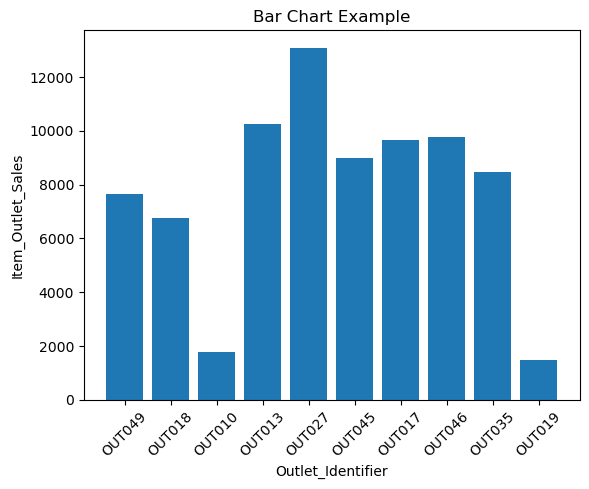

In [238]:
plt.bar(df1["Outlet_Identifier"],df1["Item_Outlet_Sales"],align='center')
plt.xticks(rotation=45)
plt.title("Bar Chart Example")
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.show()

In [239]:
df1 = pd.get_dummies(df1,columns = ["Outlet_Identifier"],prefix ="OT",drop_first=True)

In [240]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                6113 non-null   object 
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
 9   IT_Breads                  8523 non-null   uint8  
 10  IT_Canned                  8523 non-null   uint8  
 11  IT_Dairy                   8523 non-null   uint8  
 12  IT_Frozen Foods            8523 non-null   uint8  
 13  IT_Fruits and Vegetables   8523 non-null   uint8

#### 8. Outlet_Establishment_Year


In [241]:
df1["Outlet_Establishment_Year"].isna().sum()

0

In [242]:
df1["Outlet_Establishment_Year"].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [243]:
df1 = pd.get_dummies(df1,columns = ["Outlet_Establishment_Year"],prefix ="OEY",drop_first=True)


#### 9.Outlet_Size

In [244]:
df1["Outlet_Size"].shape

(8523,)

In [245]:
# in this column 28.27% data is missing
df1["Outlet_Size"].isna().mean()*100

28.27642848762173

In [246]:
df1["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [247]:
# as this column having 28% of missing value so i am imputing this value standalone value "Unknow"
df1["Outlet_Size"] = df1["Outlet_Size"].replace({np.nan:"Notknown"})

In [248]:
df1["Outlet_Size"].value_counts().to_dict()

{'Medium': 2793, 'Notknown': 2410, 'Small': 2388, 'High': 932}

In [249]:
Outlet_Size_value = {'Medium': 2, 'Notknown': 0, 'Small': 1, 'High': 3}
Outlet_Size_value

{'Medium': 2, 'Notknown': 0, 'Small': 1, 'High': 3}

In [250]:
# ordinal enconding
ordinal_encoding = OrdinalEncoder(categories=[["Notknown","Small","Medium","High"]])

In [251]:
ordinal_encoding_Outlet_Size = ordinal_encoding.fit_transform(df1[["Outlet_Size"]])

In [252]:
df_Outlet_Size = pd.DataFrame(ordinal_encoding_Outlet_Size,columns = ["Outlet_Size"],dtype = int)

In [253]:
df1.shape

(8523, 37)

In [254]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Item_Weight               8523 non-null   float64
 1   Item_Fat_Content          8523 non-null   int32  
 2   Item_Visibility           8523 non-null   float64
 3   Item_MRP                  8523 non-null   float64
 4   Outlet_Size               8523 non-null   object 
 5   Outlet_Location_Type      8523 non-null   object 
 6   Outlet_Type               8523 non-null   object 
 7   Item_Outlet_Sales         8523 non-null   float64
 8   IT_Breads                 8523 non-null   uint8  
 9   IT_Canned                 8523 non-null   uint8  
 10  IT_Dairy                  8523 non-null   uint8  
 11  IT_Frozen Foods           8523 non-null   uint8  
 12  IT_Fruits and Vegetables  8523 non-null   uint8  
 13  IT_Hard Drinks            8523 non-null   uint8  
 14  IT_Healt

In [255]:
df1 = pd.concat([df1.iloc[:,:4],df_Outlet_Size,df1.iloc[:,5:]],axis=1)
df1.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,IT_Breads,IT_Canned,...,OT_OUT046,OT_OUT049,OEY_1987,OEY_1997,OEY_1998,OEY_1999,OEY_2002,OEY_2004,OEY_2007,OEY_2009
0,9.30,0,0.016047,6.298002,2,Tier 1,Supermarket Type1,3735.1380,0,0,...,0,1,0,0,0,1,0,0,0,0
1,5.92,1,0.019278,3.641023,2,Tier 3,Supermarket Type2,443.4228,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17.50,0,0.016760,5.212421,2,Tier 1,Supermarket Type1,2097.2700,0,0,...,0,1,0,0,0,1,0,0,0,0
3,19.20,1,0.066132,5.668037,0,Tier 3,Grocery Store,732.3800,0,0,...,0,0,0,0,1,0,0,0,0,0
4,8.93,0,0.066132,3.776527,3,Tier 3,Supermarket Type1,994.7052,0,0,...,0,0,1,0,0,0,0,0,0,0


In [256]:
# df1["Outlet_Size"] = np.log(df1["Outlet_Size"])

In [257]:
# {'Medium': 2793, 'Notknown': 2410, 'Small': 2388, 'High': 932}

#### 10. Outlet_Location_Type

In [258]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Item_Weight               8523 non-null   float64
 1   Item_Fat_Content          8523 non-null   int32  
 2   Item_Visibility           8523 non-null   float64
 3   Item_MRP                  8523 non-null   float64
 4   Outlet_Size               8523 non-null   int32  
 5   Outlet_Location_Type      8523 non-null   object 
 6   Outlet_Type               8523 non-null   object 
 7   Item_Outlet_Sales         8523 non-null   float64
 8   IT_Breads                 8523 non-null   uint8  
 9   IT_Canned                 8523 non-null   uint8  
 10  IT_Dairy                  8523 non-null   uint8  
 11  IT_Frozen Foods           8523 non-null   uint8  
 12  IT_Fruits and Vegetables  8523 non-null   uint8  
 13  IT_Hard Drinks            8523 non-null   uint8  
 14  IT_Healt

In [259]:
df1["Outlet_Location_Type"].isna().sum()

0

In [260]:
df1["Outlet_Location_Type"].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [261]:
df1["Outlet_Location_Type"].value_counts().to_dict()

{'Tier 3': 3350, 'Tier 2': 2785, 'Tier 1': 2388}

In [262]:
Outlet_Location_Type_value = {'Tier 3': 2, 'Tier 2': 1, 'Tier 1': 0}
Outlet_Location_Type_value

{'Tier 3': 2, 'Tier 2': 1, 'Tier 1': 0}

In [263]:
# ordinal enconding
ordinal_encoding_2 = OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3']])

In [264]:
ordinal_encoding_Outlet_Location_Type = ordinal_encoding_2.fit_transform(df1[["Outlet_Location_Type"]])

In [265]:
df_Outlet_Location_Type = pd.DataFrame(ordinal_encoding_Outlet_Location_Type,columns = ["Outlet_Location_Type"],dtype = int)

In [266]:
df1 = pd.concat([df1.iloc[:,:5],df_Outlet_Location_Type,df1.iloc[:,6:]],axis=1)
df1.head(4)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,IT_Breads,IT_Canned,...,OT_OUT046,OT_OUT049,OEY_1987,OEY_1997,OEY_1998,OEY_1999,OEY_2002,OEY_2004,OEY_2007,OEY_2009
0,9.30,0,0.016047,6.298002,2,0,Supermarket Type1,3735.1380,0,0,...,0,1,0,0,0,1,0,0,0,0
1,5.92,1,0.019278,3.641023,2,2,Supermarket Type2,443.4228,0,0,...,0,0,0,0,0,0,0,0,0,1
2,17.50,0,0.016760,5.212421,2,0,Supermarket Type1,2097.2700,0,0,...,0,1,0,0,0,1,0,0,0,0
3,19.20,1,0.066132,5.668037,0,2,Grocery Store,732.3800,0,0,...,0,0,0,0,1,0,0,0,0,0


In [267]:
df1["Outlet_Location_Type"].unique()

array([0, 2, 1])

<AxesSubplot:xlabel='Outlet_Location_Type'>

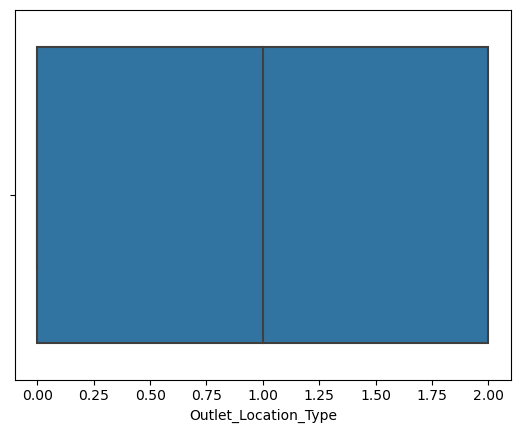

In [268]:
# df1["Outlet_Location_Type"] = np.sqrt(df1["Outlet_Location_Type"])
sns.boxplot(df1["Outlet_Location_Type"])

#### 12. Outlet_Type

In [269]:
df1["Outlet_Type"].isna().sum()

0

In [270]:
df1["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [271]:
df1["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

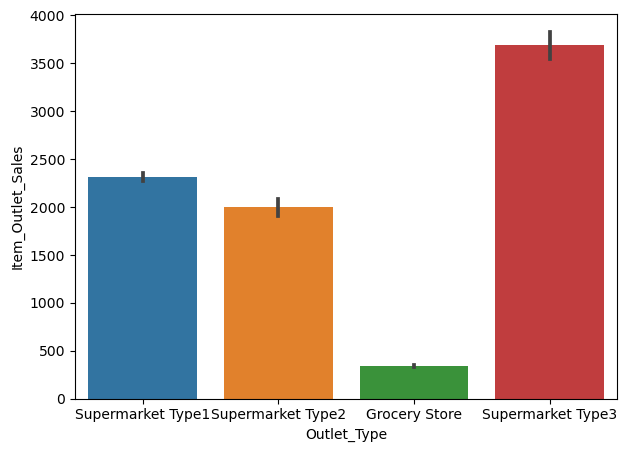

In [272]:
plt.figure(figsize=(7,5))
sns.barplot(df1['Outlet_Type'], df1['Item_Outlet_Sales'])

In [273]:
df1 = pd.get_dummies(df1,columns =["Outlet_Type"], prefix = "OT",drop_first=True)

In [274]:
#rearranging the dependent variable
df1 = pd.concat([df1.drop("Item_Outlet_Sales",axis=1),df1["Item_Outlet_Sales"]],axis=1)
df1.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,IT_Breads,IT_Canned,IT_Dairy,IT_Frozen Foods,...,OEY_1998,OEY_1999,OEY_2002,OEY_2004,OEY_2007,OEY_2009,OT_Supermarket Type1,OT_Supermarket Type2,OT_Supermarket Type3,Item_Outlet_Sales
0,9.30,0,0.016047,6.298002,2,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,3735.1380
1,5.92,1,0.019278,3.641023,2,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,443.4228
2,17.50,0,0.016760,5.212421,2,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2097.2700
3,19.20,1,0.066132,5.668037,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,732.3800
4,8.93,0,0.066132,3.776527,3,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,994.7052


In [275]:
df1.shape

(8523, 39)

In [276]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Item_Weight               8523 non-null   float64
 1   Item_Fat_Content          8523 non-null   int32  
 2   Item_Visibility           8523 non-null   float64
 3   Item_MRP                  8523 non-null   float64
 4   Outlet_Size               8523 non-null   int32  
 5   Outlet_Location_Type      8523 non-null   int32  
 6   IT_Breads                 8523 non-null   uint8  
 7   IT_Canned                 8523 non-null   uint8  
 8   IT_Dairy                  8523 non-null   uint8  
 9   IT_Frozen Foods           8523 non-null   uint8  
 10  IT_Fruits and Vegetables  8523 non-null   uint8  
 11  IT_Hard Drinks            8523 non-null   uint8  
 12  IT_Health and Hygiene     8523 non-null   uint8  
 13  IT_Household              8523 non-null   uint8  
 14  IT_Meat 

#### 11.Item_Outlet_Sales

#### While Item_Outlet_Sales having very high value, which can be happen, festival season the sales can increases exponentially

In [277]:
df1["Item_Outlet_Sales"].isna().sum()

0

In [278]:
# array_boxcox = boxcox(df1["Item_Outlet_Sales"])[0]
# array_boxcox

<AxesSubplot:xlabel='Item_Outlet_Sales'>

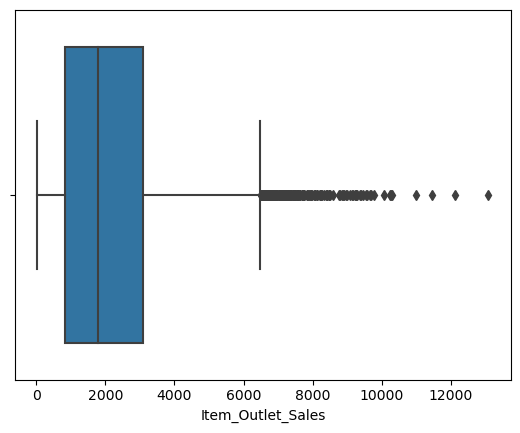

In [279]:
sns.boxplot(df1["Item_Outlet_Sales"])

In [280]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,IT_Breads,IT_Canned,IT_Dairy,IT_Frozen Foods,...,OEY_1998,OEY_1999,OEY_2002,OEY_2004,OEY_2007,OEY_2009,OT_Supermarket Type1,OT_Supermarket Type2,OT_Supermarket Type3,Item_Outlet_Sales
0,9.300,0,0.016047,6.298002,2,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,3735.1380
1,5.920,1,0.019278,3.641023,2,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,443.4228
2,17.500,0,0.016760,5.212421,2,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2097.2700
3,19.200,1,0.066132,5.668037,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,732.3800
4,8.930,0,0.066132,3.776527,3,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,5.986282,3,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2778.3834
8519,8.380,1,0.046982,4.764510,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,549.2850
8520,10.600,0,0.035186,4.398939,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1193.1136
8521,7.210,1,0.145221,4.689568,2,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1845.5976


# checking assumption

## checking Linearity after filling null values and outliers in data

<AxesSubplot:>

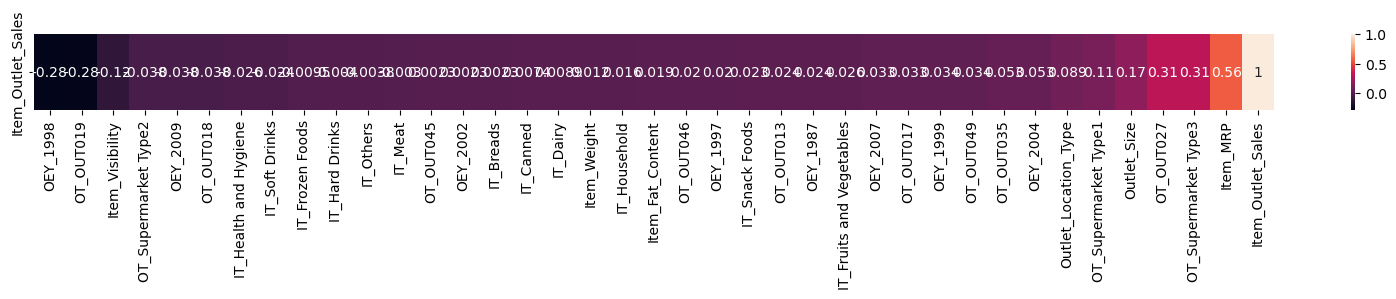

In [281]:
plt.figure(figsize=(20,0.98))
sns.heatmap(df1.corr().tail(1).sort_values("Item_Outlet_Sales",axis=1),annot=True)

In [282]:
a = df1.corr()
a[["Item_Outlet_Sales"]].sort_values("Item_Outlet_Sales",ascending =True)

,Item_Outlet_Sales
OEY_1998,-0.284883
OT_OUT019,-0.277250
Item_Visibility,-0.120612
OT_Supermarket Type2,-0.038059
OEY_2009,-0.038059
OT_OUT018,-0.038059
IT_Health and Hygiene,-0.025587
IT_Soft Drinks,-0.024040
IT_Frozen Foods,-0.009482
IT_Hard Drinks,-0.003956


In [283]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Item_Weight               8523 non-null   float64
 1   Item_Fat_Content          8523 non-null   int32  
 2   Item_Visibility           8523 non-null   float64
 3   Item_MRP                  8523 non-null   float64
 4   Outlet_Size               8523 non-null   int32  
 5   Outlet_Location_Type      8523 non-null   int32  
 6   IT_Breads                 8523 non-null   uint8  
 7   IT_Canned                 8523 non-null   uint8  
 8   IT_Dairy                  8523 non-null   uint8  
 9   IT_Frozen Foods           8523 non-null   uint8  
 10  IT_Fruits and Vegetables  8523 non-null   uint8  
 11  IT_Hard Drinks            8523 non-null   uint8  
 12  IT_Health and Hygiene     8523 non-null   uint8  
 13  IT_Household              8523 non-null   uint8  
 14  IT_Meat 

## checking No multicolinarity after imputing null values and outliers

<AxesSubplot:>

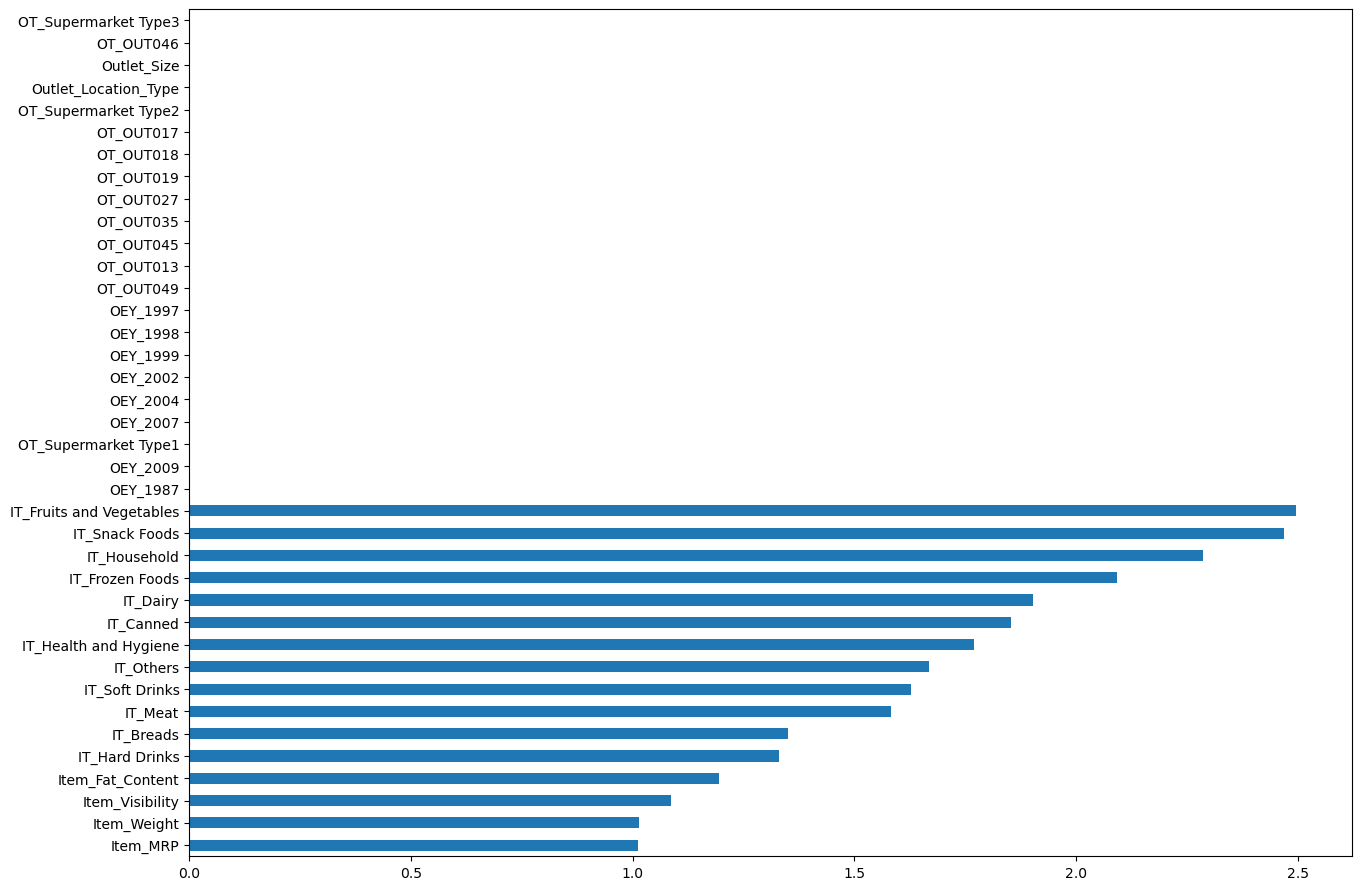

In [284]:
# it seems multicolinarity not present in our data
VIF_list = []
df2 = df1.drop(["Item_Outlet_Sales"],axis=1)
for i in range(df2.shape[1]):
    VIF = variance_inflation_factor(df2,i)
    VIF_list.append(VIF)
s1 = pd.Series(VIF_list, index=df2.columns)
plt.figure(figsize=(15,11))
s1.sort_values().plot(kind = 'barh')

In [285]:
VIF_list

[1.0140333407726227,
 1.1946037105228657,
 1.086784636995801,
 1.0123531143753577,
 inf,
 inf,
 1.3497542861345977,
 1.853247551854942,
 1.9032690658459683,
 2.0922714813912373,
 2.4967817736956244,
 1.3304814597463983,
 1.7708699673763348,
 2.2863021279398676,
 1.5820072605778384,
 1.669017106023528,
 2.4692180123353307,
 1.6284486916837464,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

# Train Test Split

In [286]:
x_train,x_test,y_train,y_test = train_test_split(df1.drop("Item_Outlet_Sales",axis=1),df1["Item_Outlet_Sales"],test_size=0.20,random_state=11)

In [287]:
print("shape of x_train:",x_train.shape)
print("shape of y_train:",y_train.shape)
print("shape of x_test:",x_test.shape)
print("shape of y_test:",y_test.shape)

shape of x_train: (6818, 38)
shape of y_train: (6818,)
shape of x_test: (1705, 38)
shape of y_test: (1705,)


In [288]:
x_train.reset_index(inplace=True,drop=True)
x_test.reset_index(inplace=True,drop=True)
y_train.reset_index(inplace=True,drop=True)
y_test.reset_index(inplace=True,drop=True)
x_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,IT_Breads,IT_Canned,IT_Dairy,IT_Frozen Foods,...,OEY_1997,OEY_1998,OEY_1999,OEY_2002,OEY_2004,OEY_2007,OEY_2009,OT_Supermarket Type1,OT_Supermarket Type2,OT_Supermarket Type3
0,11.600000,1,0.157719,5.521649,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,12.350000,1,0.033952,5.821035,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
2,8.895000,1,0.088305,4.979557,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,12.857645,0,0.056685,5.629826,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,7.360000,0,0.052418,3.838546,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6813,16.000000,0,0.060943,6.087967,2,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6814,8.390000,0,0.120397,5.467988,3,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6815,8.315000,1,0.035773,5.245658,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
6816,10.300000,0,0.146999,4.699122,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


# Model Training

In [289]:
Model_1 = LinearRegression()
Model_1.fit(x_train,y_train)

LinearRegression()

In [290]:
# checking accuracy on training data
y_pred_train = Model_1.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)


Mean Sqaured Error : 1284678.801768271
Root Mean Sqaured Error : 1133.4367215545255
Mean Absolute Error : 843.3850209151369
R Squared Value : 0.5575026897365511
Adjusted R-Squared Value : 0.555022250469696


In [291]:
# checking accuracy on testing data
y_pred_test = Model_1.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_test, y_pred_test)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1353314.6078783327
Root Mean Sqaured Error : 1163.3205095236362
Mean Absolute Error : 860.1884104474461
R Squared Value : 0.5399764257251178
Adjusted R-Squared Value : 0.5294836911378156


## 3. Assumption Normality of residual

In [292]:
Residual = (y_pred_train - y_train)


## 3.1 KDEplot

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

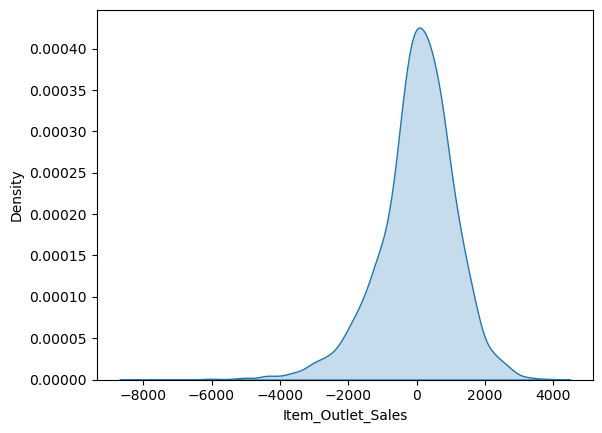

In [293]:
sns.kdeplot(Residual,fill=True)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Count'>

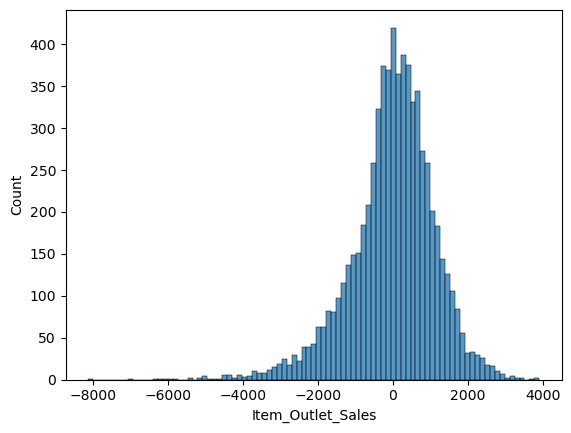

In [294]:
sns.histplot(Residual)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

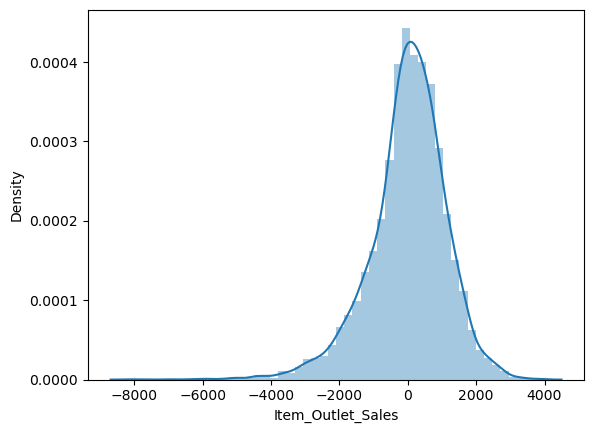

In [295]:
sns.distplot(Residual)

## 3.2 QQ plot

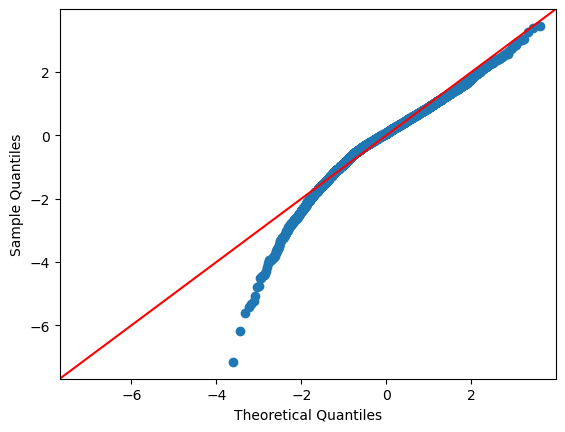

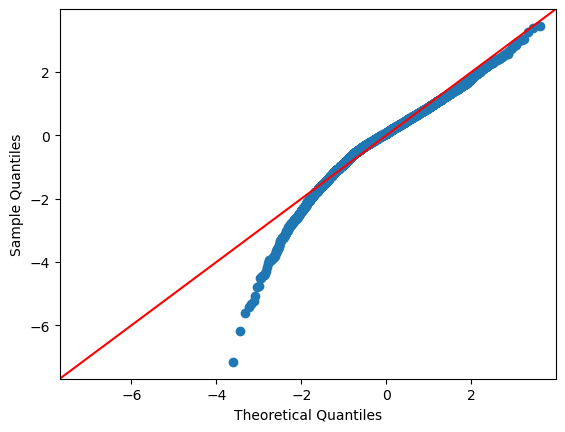

In [296]:
sm.qqplot(Residual,line="45",fit=True)

## 3.3 skewness

In [297]:
skew(Residual)

-0.8029835287173944

## 3.4 hypothesis testing

In [298]:
from scipy.stats import shapiro, kstest,normaltest

In [299]:
_ , p_value = shapiro(Residual)
print("p_value:",p_value)

if p_value >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")
    

p_value: 2.4341794194203307e-37
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


In [300]:
_ , p_value = kstest(Residual,"norm")
print("p_value:",p_value)

if p_value >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

p_value: 0.0
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


In [301]:
_ , p_value = normaltest(Residual)
print("p_value:",p_value)

if p_value >= 0.05:
    print("Null Hypothesis is Accepted")
    print("--> Data is Normally Distributed")
else:
    print("Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted")
    print("Data is NOT Normally Distributed")

p_value: 2.953641071015379e-209
Null Hypothesis is Rejected >> Alternate Hypothesis is Accepted
Data is NOT Normally Distributed


In [302]:
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,IT_Breads,IT_Canned,IT_Dairy,IT_Frozen Foods,...,OEY_1998,OEY_1999,OEY_2002,OEY_2004,OEY_2007,OEY_2009,OT_Supermarket Type1,OT_Supermarket Type2,OT_Supermarket Type3,Item_Outlet_Sales
0,9.300,0,0.016047,6.298002,2,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,3735.1380
1,5.920,1,0.019278,3.641023,2,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,443.4228
2,17.500,0,0.016760,5.212421,2,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2097.2700
3,19.200,1,0.066132,5.668037,0,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,732.3800
4,8.930,0,0.066132,3.776527,3,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,5.986282,3,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2778.3834
8519,8.380,1,0.046982,4.764510,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,549.2850
8520,10.600,0,0.035186,4.398939,1,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1193.1136
8521,7.210,1,0.145221,4.689568,2,2,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1845.5976


## 4. Assumption Homoscadasticity

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Outlet_Sales'>

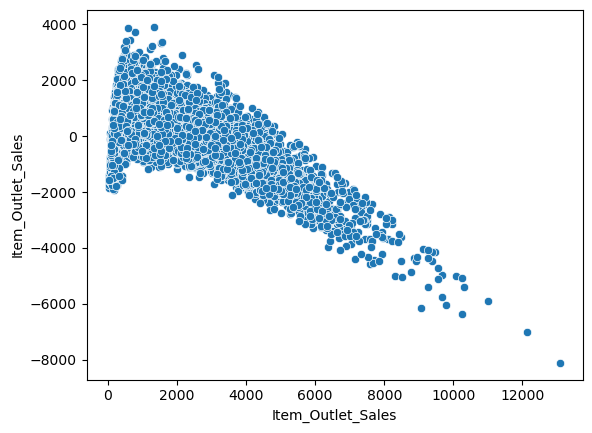

In [303]:
sns.scatterplot(x=y_train, y=Residual)

In [304]:
ridge_reg_model = Ridge(alpha= 1.0)  # Lambda = alpha= 1.0 (bydefault)

ridge_reg_model.fit(x_train, y_train)

Ridge()

In [305]:
y_pred_train = ridge_reg_model.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1284679.5783366233
Root Mean Sqaured Error : 1133.4370641269074
Mean Absolute Error : 843.3557431682633
R Squared Value : 0.5575024222538101
Adjusted R-Squared Value : 0.555021981487568


In [306]:
y_pred_test = ridge_reg_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_test, y_pred_test)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1353335.9089525451
Root Mean Sqaured Error : 1163.329664778022
Mean Absolute Error : 860.1932026096424
R Squared Value : 0.5399691849872745
Adjusted R-Squared Value : 0.5294762852450875


## hyperparamter tunning

#### RandomizedSearchCV on Ridge Regression

In [307]:
Ridge_model = Ridge()

# Defined param_grid
param_grid = {"alpha": np.arange(0.01,3,0.01)}


rscv_Ridge_model = RandomizedSearchCV(Ridge_model, param_grid, n_jobs=-1,cv=5)

rscv_Ridge_model.fit(x_train, y_train)

rscv_Ridge_model.best_estimator_

Ridge(alpha=2.9099999999999997)

#### GridSearchCV on Ridge Regression

In [308]:
Ridge_model = Ridge()

# Defined param_grid
param_grid = {"alpha": np.arange(0.01,3,0.01)}


gscv_Ridge_model = GridSearchCV(Ridge_model, param_grid, n_jobs=-1,cv=5)

gscv_Ridge_model.fit(x_train, y_train)

gscv_Ridge_model.best_estimator_

Ridge(alpha=2.9899999999999998)

#### GridSearchCV on lasso Regression

In [309]:
lasso_model = Lasso()

# Defined param_grid
param_grid = {"alpha": np.arange(0.01,3,0.01)}


gscv_lasso_model = GridSearchCV(lasso_model, param_grid, n_jobs=-1,cv=5)

gscv_lasso_model.fit(x_train, y_train)

gscv_lasso_model.best_estimator_

Lasso(alpha=2.38)

#### RandmisedSearchCV on lasso Regression

In [310]:
lasso_model = Lasso()

# Defined param_grid
param_grid = {"alpha": np.arange(0.01,3,0.01)}


rscv_lasso_model = RandomizedSearchCV(lasso_model, param_grid, n_jobs=-1,cv=5)

rscv_lasso_model.fit(x_train, y_train)

rscv_lasso_model.best_estimator_

Lasso(alpha=2.4699999999999998)

### Lasso Regularisation

In [311]:
# randomised CV hyperparamter
lasso_model_randmised_search = rscv_lasso_model.best_estimator_  # Lambda = alpha= 1.0 (bydefault)

lasso_model_randmised_search.fit(x_train, y_train)

Lasso(alpha=2.4699999999999998)

In [312]:
y_pred_train = lasso_model_randmised_search.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1285888.9577002265
Root Mean Sqaured Error : 1133.970439517815
Mean Absolute Error : 842.8494182322507
R Squared Value : 0.5570858612311281
Adjusted R-Squared Value : 0.5546030854126863


In [313]:
y_pred_test = lasso_model_randmised_search.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_test, y_pred_test)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1348615.8034203833
Root Mean Sqaured Error : 1161.29918772915
Mean Absolute Error : 858.6809965385473
R Squared Value : 0.5415736602550498
Adjusted R-Squared Value : 0.531117357187638


In [314]:
# Grid CV hyperparamter
lasso_model_grid_search = gscv_lasso_model.best_estimator_  # Lambda = alpha= 1.0 (bydefault)

lasso_model_grid_search.fit(x_train, y_train)

Lasso(alpha=2.38)

In [315]:
y_pred_train = lasso_model_grid_search.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1285836.7978522237
Root Mean Sqaured Error : 1133.9474405157514
Mean Absolute Error : 842.8550401023978
R Squared Value : 0.5571038272724554
Adjusted R-Squared Value : 0.5546211521634945


In [316]:
y_pred_test = lasso_model_grid_search.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_test, y_pred_test)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1348629.3980418772
Root Mean Sqaured Error : 1161.3050409095265
Mean Absolute Error : 858.6940798621971
R Squared Value : 0.5415690391223626
Adjusted R-Squared Value : 0.5311126306509639


### Ridge Regularisation

In [317]:
# randomised CV hyperparamter
ridge_model_randomisedsearch = rscv_Ridge_model.best_estimator_ # Lambda = alpha= 1.0 (bydefault)

ridge_model_randomisedsearch.fit(x_train, y_train)

Ridge(alpha=2.9099999999999997)

In [318]:
y_pred_train = ridge_model_randomisedsearch.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1284685.2684969539
Root Mean Sqaured Error : 1133.4395742592342
Mean Absolute Error : 843.3015581381045
R Squared Value : 0.5575004623237187
Adjusted R-Squared Value : 0.5550200105709973


In [319]:
y_pred_test = ridge_model_randomisedsearch.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_test, y_pred_test)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1353380.8454790374
Root Mean Sqaured Error : 1163.3489783719403
Mean Absolute Error : 860.2026618352483
R Squared Value : 0.5399539100013903
Adjusted R-Squared Value : 0.5294606618501615


In [320]:
# Gridsearch Cv as hyperparamter
ridge_model_gridesearch = gscv_Ridge_model.best_estimator_ # Lambda = alpha= 1.0 (bydefault)

ridge_model_gridesearch.fit(x_train, y_train)

Ridge(alpha=2.9899999999999998)

In [321]:
y_pred_train = ridge_model_gridesearch.predict(x_train)
mse = mean_squared_error(y_train,y_pred_train)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_train, y_pred_train)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_train.shape[0] - 1)) / (x_train.shape[0] - x_train.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1284685.624613661
Root Mean Sqaured Error : 1133.4397313548088
Mean Absolute Error : 843.299323045164
R Squared Value : 0.557500339662175
Adjusted R-Squared Value : 0.5550198872218686


In [322]:
y_pred_test = ridge_model_gridesearch.predict(x_test)
mse = mean_squared_error(y_test,y_pred_test)
print("Mean Sqaured Error :",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaured Error :",rmse)
mae = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error :",mae)
r_squared_value = r2_score(y_test, y_pred_test)
print("R Squared Value :",r_squared_value)
adj_r2  = 1 - (((1 - r_squared_value) * (x_test.shape[0] - 1)) / (x_test.shape[0] - x_test.shape[1] - 1))
print("Adjusted R-Squared Value :",adj_r2)

Mean Sqaured Error : 1353382.851230746
Root Mean Sqaured Error : 1163.3498404309626
Mean Absolute Error : 860.2031301339155
R Squared Value : 0.5399532281990476
Adjusted R-Squared Value : 0.5294599644965048


# Visualization

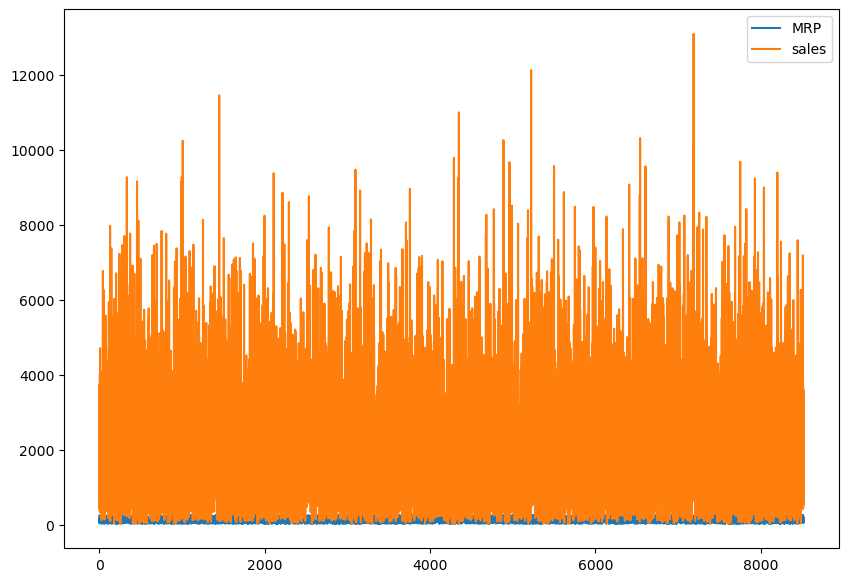

In [323]:
df["Item_MRP"].plot(label="MRP",figsize = (10,7))
df["Item_Outlet_Sales"].plot(label="sales")
plt.legend()

In [324]:
x_train.head(1).T

,0
Item_Weight,11.600000
Item_Fat_Content,1.000000
Item_Visibility,0.157719
Item_MRP,5.521649
Outlet_Size,0.000000
Outlet_Location_Type,1.000000
IT_Breads,0.000000
IT_Canned,0.000000
IT_Dairy,0.000000
IT_Frozen Foods,0.000000


In [325]:
columns_names = x_train.columns
len(columns_names)

38

In [326]:
with open ("linear_ridge_regularisation_model.pkl","wb") as f:
    pickle.dump(lasso_model_randmised_search,f)

In [327]:
json_data = { "Item_Fat_Content":Item_Fat_Content_values,
                "Outlet_Size":Outlet_Size_value,
             "Outlet_Location_Type" : Outlet_Location_Type_value,
             "columns": list(columns_names)
             
    
}
json_data

{'Item_Fat_Content': {'Low Fat': 0, 'Regular': 1},
 'Outlet_Size': {'Medium': 2, 'Notknown': 0, 'Small': 1, 'High': 3},
 'Outlet_Location_Type': {'Tier 3': 2, 'Tier 2': 1, 'Tier 1': 0},
 'columns': ['Item_Weight',
  'Item_Fat_Content',
  'Item_Visibility',
  'Item_MRP',
  'Outlet_Size',
  'Outlet_Location_Type',
  'IT_Breads',
  'IT_Canned',
  'IT_Dairy',
  'IT_Frozen Foods',
  'IT_Fruits and Vegetables',
  'IT_Hard Drinks',
  'IT_Health and Hygiene',
  'IT_Household',
  'IT_Meat',
  'IT_Others',
  'IT_Snack Foods',
  'IT_Soft Drinks',
  'OT_OUT013',
  'OT_OUT017',
  'OT_OUT018',
  'OT_OUT019',
  'OT_OUT027',
  'OT_OUT035',
  'OT_OUT045',
  'OT_OUT046',
  'OT_OUT049',
  'OEY_1987',
  'OEY_1997',
  'OEY_1998',
  'OEY_1999',
  'OEY_2002',
  'OEY_2004',
  'OEY_2007',
  'OEY_2009',
  'OT_Supermarket Type1',
  'OT_Supermarket Type2',
  'OT_Supermarket Type3']}

In [328]:
with open("Project_data.json", "w") as f:
    json.dump(json_data, f)

# Single user input testing

In [329]:
Item_Weight = 10
Item_Fat_Content = "Low Fat"
Item_Visibility = 0.08
Item_Type = "Household"
Item_MRP = 46
Outlet_Identifier = "OUT035"
Outlet_Establishment_Year = 2007
Outlet_Size = "Small"
Outlet_Location_Type = "Tier 2"
Outlet_Type = "Supermarket Type1"

Item_Type ="IT_" + Item_Type
Outlet_Establishment_Year = "OEY_" + str(Outlet_Establishment_Year)

Outlet_Type ="OT_" + Outlet_Type
Outlet_Identifier ="OT_" + Outlet_Identifier



In [330]:
Item_Type_index = list(columns_names).index(Item_Type)
Item_Type_index

13

In [331]:
Outlet_Identifier_index = list(columns_names).index(Outlet_Identifier)
Outlet_Identifier_index

23

In [332]:
Outlet_Establishment_Year_index = list(columns_names).index(Outlet_Establishment_Year)
Outlet_Establishment_Year_index

33

In [333]:
Outlet_Type_index = list(columns_names).index(Outlet_Type)
Outlet_Type_index

35

In [334]:
json_data['columns']

['Item_Weight',
 'Item_Fat_Content',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Size',
 'Outlet_Location_Type',
 'IT_Breads',
 'IT_Canned',
 'IT_Dairy',
 'IT_Frozen Foods',
 'IT_Fruits and Vegetables',
 'IT_Hard Drinks',
 'IT_Health and Hygiene',
 'IT_Household',
 'IT_Meat',
 'IT_Others',
 'IT_Snack Foods',
 'IT_Soft Drinks',
 'OT_OUT013',
 'OT_OUT017',
 'OT_OUT018',
 'OT_OUT019',
 'OT_OUT027',
 'OT_OUT035',
 'OT_OUT045',
 'OT_OUT046',
 'OT_OUT049',
 'OEY_1987',
 'OEY_1997',
 'OEY_1998',
 'OEY_1999',
 'OEY_2002',
 'OEY_2004',
 'OEY_2007',
 'OEY_2009',
 'OT_Supermarket Type1',
 'OT_Supermarket Type2',
 'OT_Supermarket Type3']

In [335]:
test_array = np.zeros(len(columns_names))

test_array[0] = Item_Weight
test_array[1] = json_data['Item_Fat_Content'][Item_Fat_Content]
test_array[2] = Item_Visibility
test_array[3] = np.cbrt(Item_MRP)
test_array[4] = json_data['Outlet_Size'][Outlet_Size]
test_array[5] = json_data["Outlet_Location_Type"][Outlet_Location_Type]
test_array[Item_Type_index] = 1
test_array[Outlet_Identifier_index] = 1
test_array[Outlet_Establishment_Year_index] = 0
test_array[Outlet_Type_index] = 0


test_array

array([10.        ,  0.        ,  0.08      ,  3.58304787,  1.        ,
        1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [336]:
sales = round(lasso_model_randmised_search.predict([test_array])[0],2)
print("Predicted Item Outlet Sales is :", sales, "/- Rs. Only")

Predicted Item Outlet Sales is : 381.33 /- Rs. Only


In [337]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
